In [3]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import zillow_wrangle
import zillow_explore
from zillow_explore import plot_categorical_and_continuous_vars

# Acquire the data

In [17]:
import os
def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    

In [18]:
df = zillow_wrangle.acquire_data()

In [43]:
df.shape

(2152359, 7)

In [44]:
df.dropna()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,1862.870784,27516.0,1960.950824,5634.944023,6037.0
1,0.0,0.0,1862.870784,10.0,1960.950824,5634.944023,6037.0
2,0.0,0.0,1862.870784,10.0,1960.950824,5634.944023,6037.0
3,0.0,0.0,1862.870784,2108.0,1960.950824,174.210000,6037.0
4,4.0,2.0,3633.000000,296425.0,2005.000000,6941.390000,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.000000,960756.0,2015.000000,13494.520000,6059.0
2152859,4.0,4.5,3127.000000,536061.0,2014.000000,6244.160000,6059.0
2152860,0.0,0.0,1862.870784,208057.0,1960.950824,5783.880000,6059.0
2152861,3.0,2.5,1974.000000,424353.0,2015.000000,5302.700000,6059.0


In [45]:
df.shape

(2152359, 7)

In [21]:
df = zillow_wrangle.clean_and_impute_data(df)

# Explore

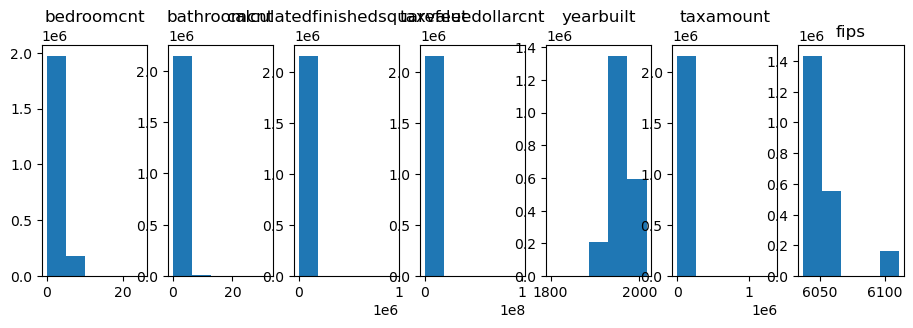

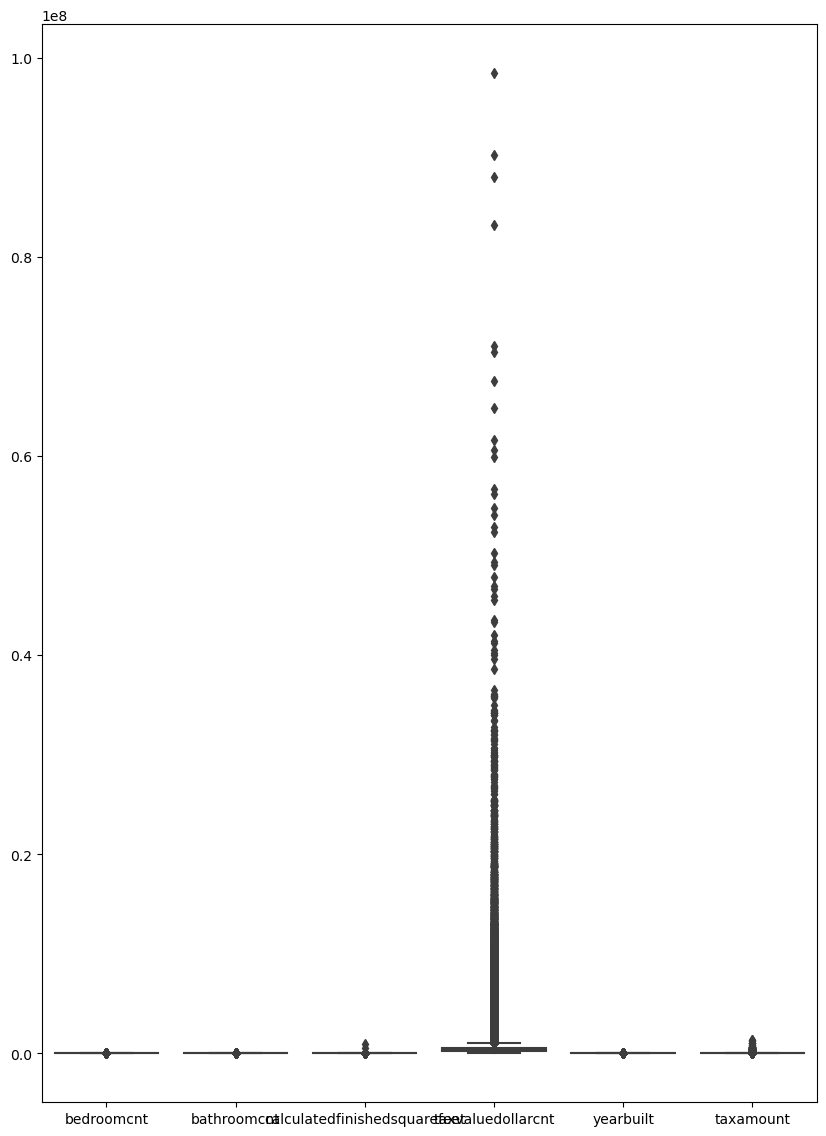

In [24]:
zillow_wrangle.visualize_data(df)

In [38]:
categorical_var = 'fips'
continuous_var = 'taxvaluedollarcnt'


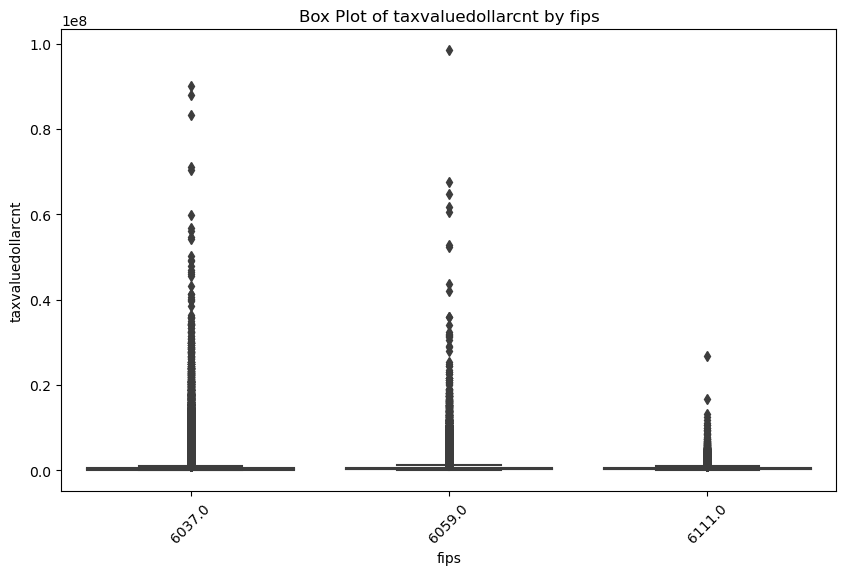

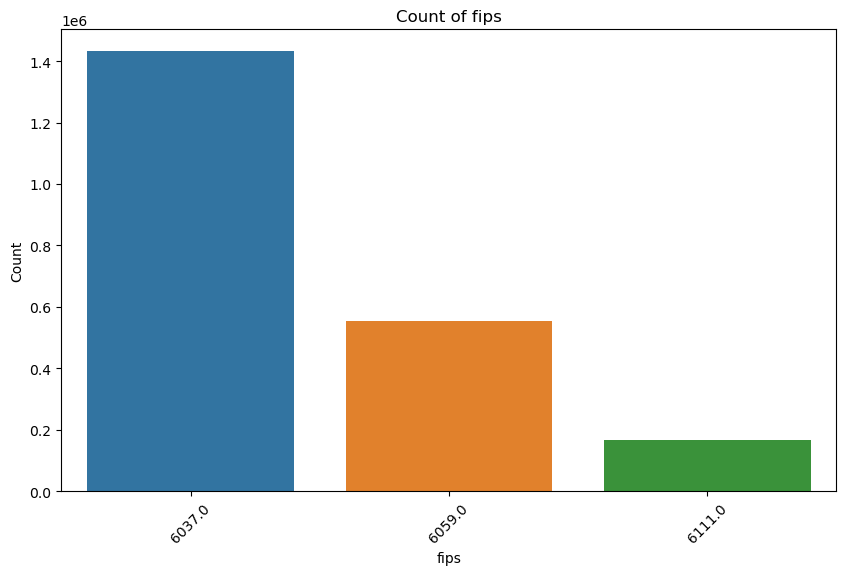

In [39]:
plot_categorical_and_continuous_vars(df, categorical_var, continuous_var)

In [53]:
def split_train_val_test(df):
    #split data
    seed = 42

    train, val_test = train_test_split(df, train_size=0.7,
                                    random_state=seed)

    val, test = train_test_split(val_test, train_size=0.5,
                                random_state=seed)
    return train, val, test

In [54]:
train, val, test = split_train_val_test(df)

In [61]:
def scale_train_val_test(train, val, test):

    mms = MinMaxScaler()

    # Fit the scaler on the training data for all columns you want to scale
    columns_to_scale = ['year_built', 'area'] # 'taxamount',
    mms.fit(train[columns_to_scale])
    
    # Transform the specified columns for each dataset
    train[columns_to_scale] = mms.transform(train[columns_to_scale])
    val[columns_to_scale] = mms.transform(val[columns_to_scale])
    test[columns_to_scale] = mms.transform(test[columns_to_scale])
    
    return train, val, test